In [1]:
import pandas as pd

df = pd.read_csv('datasets/credit_train_with_features.csv')
df

,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Credit Score Class,Debt Income Ratio,Credit Utilization,Delinquency Past Year
0,Fully Paid,139004.918823,Short Term,2559110.0,2,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,437171.0,2,0.087500,0.170829,False
1,Charged Off,68286.145159,Long Term,1133274.0,8,Rent,Debt Consolidation,9632.81,17.4,53.0,4.0,60287.0,2,0.102000,0.053197,False
2,Fully Paid,113562.548736,Long Term,1722654.0,3,Rent,Buy House,15647.45,22.3,30.0,7.0,107559.0,2,0.109000,0.062438,False
3,Fully Paid,108585.569794,Short Term,1454507.0,8,Home Mortgage,Debt Consolidation,13090.43,28.8,21.0,14.0,193990.0,2,0.107999,0.133372,False
4,Charged Off,181661.859799,Long Term,1494616.0,0,Rent,Debt Consolidation,14697.07,16.6,50.0,8.0,343995.0,2,0.118000,0.230156,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,Fully Paid,-928.116652,Short Term,855038.0,10,Home Mortgage,Buy a Car,6583.69,16.5,28.0,4.0,9861.0,2,0.092399,0.011533,False
18178,Fully Paid,23909.762065,Short Term,1297947.0,4,Own Home,Debt Consolidation,9453.26,15.9,15.0,12.0,123880.0,3,0.087399,0.095443,False
18179,Fully Paid,45563.986235,Short Term,2272514.0,2,Rent,Debt Consolidation,24808.30,20.8,18.0,6.0,96273.0,2,0.131000,0.042364,False
18180,Fully Paid,72383.253330,Short Term,1141824.0,10,Rent,Debt Consolidation,13321.28,18.8,32.0,3.0,55119.0,2,0.140000,0.048273,False


In [2]:
X = df.drop(columns=['Credit Score Class'], axis=1)
y = df['Credit Score Class']

In [3]:
X.dtypes

Loan Status                      object
Current Loan Amount             float64
Term                             object
Annual Income                   float64
Years in current job              int64
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Current Credit Balance          float64
Debt Income Ratio               float64
Credit Utilization              float64
Delinquency Past Year              bool
dtype: object

In [4]:
X.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Current Credit Balance          0
Debt Income Ratio               0
Credit Utilization              0
Delinquency Past Year           0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

les = {}
for col in X.select_dtypes(exclude='number').columns:
    if col in les:
        le = les[col]
        le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
        X[col] = X[col].apply(lambda x: le_dict.get(x, -1))
    else:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        les[col] = le

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [20, 50, 100, 150, 200],
    'random_state': [42]
}


from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1)
grid.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [20, 50, 100, 150, 200],
                         'random_state': [42]},
             scoring='accuracy')

In [7]:
# Interpret the results
pd.concat([pd.DataFrame(grid.cv_results_["params"]), pd.DataFrame({"score": grid.cv_results_["mean_test_score"]})], axis=1).sort_values(by="score", ascending=False).sort_values(by="score", ascending=False)

,criterion,n_estimators,random_state,score
9,entropy,200,42,0.731053
14,log_loss,200,42,0.731053
13,log_loss,150,42,0.729733
8,entropy,150,42,0.729733
4,gini,200,42,0.729623
7,entropy,100,42,0.729458
12,log_loss,100,42,0.729458
3,gini,150,42,0.729348
2,gini,100,42,0.727368
11,log_loss,50,42,0.726873


In [8]:
rf = grid.best_estimator_
feature_importances = rf.feature_importances_

# Display feature importances
fi = pd.DataFrame(zip(X.columns, feature_importances), columns=['feature', 'importance']).sort_values(by="importance", ascending=False)
fi

,feature,importance
1,Current Loan Amount,0.112468
2,Term,0.099899
3,Annual Income,0.094648
12,Debt Income Ratio,0.091257
8,Years of Credit History,0.088583
11,Current Credit Balance,0.086516
7,Monthly Debt,0.086213
13,Credit Utilization,0.085175
9,Months since last delinquent,0.077848
10,Number of Open Accounts,0.062477


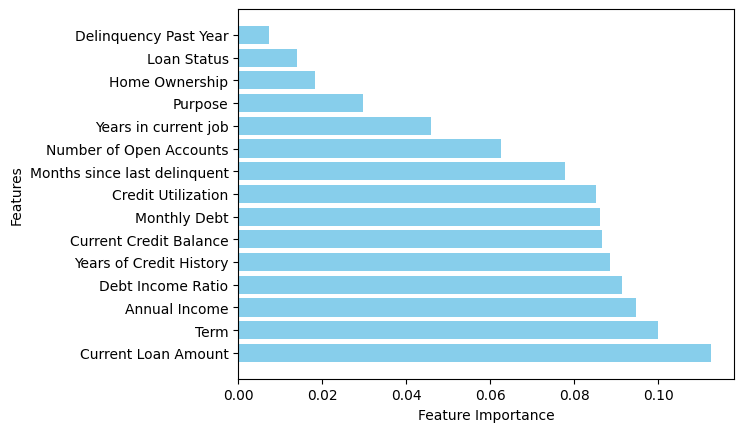

In [9]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.barh(fi['feature'], fi['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()